Here we take a very simple convolutional neural network and train it for 10 epochs, on the FashionMNIST dataset.

Hopefully this will be deterministic or the rest won't make sense!

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8
import gallery
gallery.srand(0)

m = gallery.mnist_cnn('fashion',1).train(10)

env: CUBLAS_WORKSPACE_CONFIG=:4096:8
Loading data...
Creating model...
Loaded model parameters from parameters/model_FashionMNIST_CNN1_10.json
Loaded up to epoch 10


Let's see what the convolutional layer activations are for the first 4 training images.

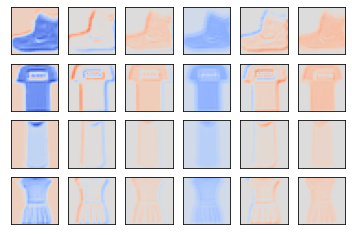

In [2]:
m.activate(4).get_activation_grid(0).plot()

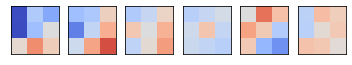

In [3]:
m.get_conv_parameters(0).plot()

We already notice something strange - one of them is all negative (blue) which means that the ReLU layer will extinguish it.

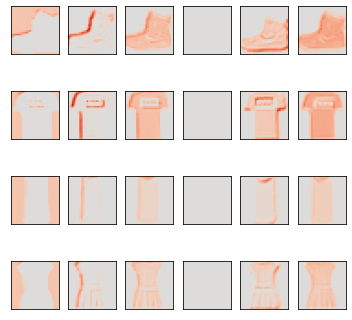

In [4]:
ra = m.activate(4).get_activation_grid(1)
ra.plot()

In [5]:
m.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

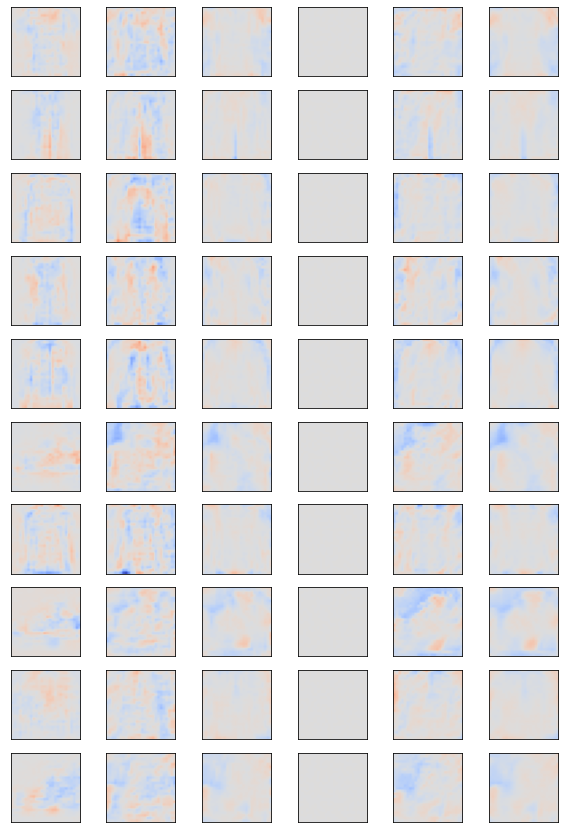

In [6]:
dp = m.get_dense_parameters(3, reshape_in=(6,26,26)).transpose()
dp.plot((10,15))

You can see there's a lot of correlation between columns 2, 4 and 5 in parameter space. This suggests we should "rotate" our view and look at principal components instead.

In [7]:
mat = dp.pca_matrix_cols()
mat

tensor([[ 1.2025e-01,  4.4174e-01, -8.5416e-01, -2.4639e-01,  1.0675e-02,
         -1.8418e-04],
        [-7.2728e-01,  6.1092e-01,  1.3197e-01,  2.8126e-01, -3.6237e-02,
          1.9490e-04],
        [-3.7166e-01, -1.4042e-01,  5.4392e-02, -5.9139e-01,  6.9960e-01,
          1.8594e-04],
        [ 4.7707e-04,  5.9199e-05, -2.8920e-04,  6.1759e-04,  5.4392e-04,
          1.0000e+00],
        [-3.8012e-01, -5.7165e-01, -4.9451e-01,  5.1055e-01,  1.5335e-01,
         -3.2655e-04],
        [-4.1711e-01, -2.9178e-01, -7.4164e-02, -4.9977e-01, -6.9686e-01,
          8.8257e-04]], device='cuda:0')

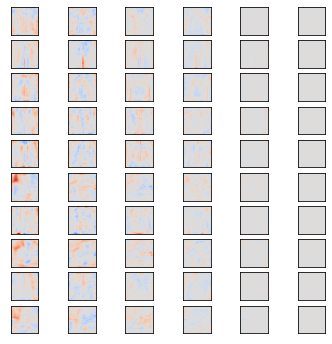

In [8]:
dp.mul_cols(mat).plot()

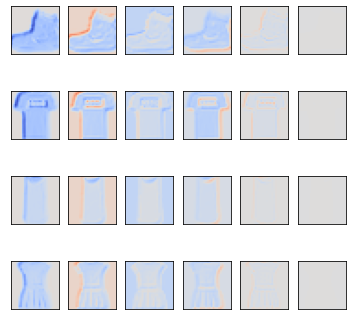

In [9]:
ra.mul_cols(mat).plot()

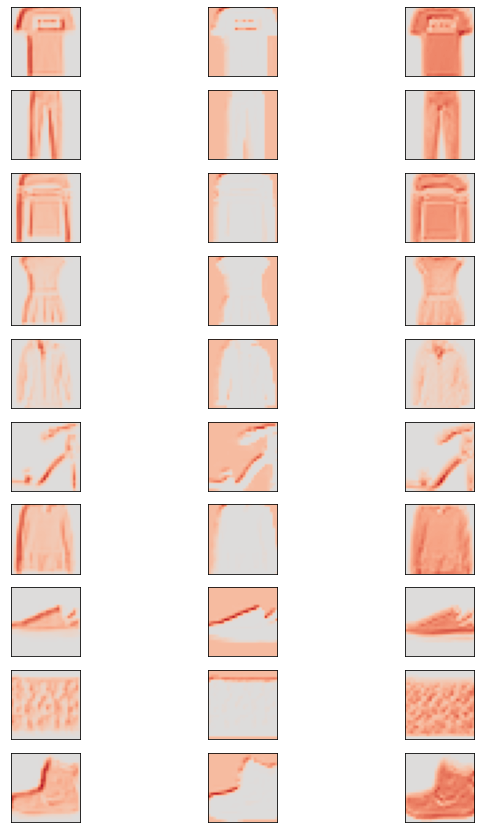

In [16]:
mat2 = m.activate(256).get_activation_grid(1).nmf_matrix_cols(3)
m.activate('classes').get_activation_grid(1).mul_cols(mat2).plot((10,15),norm='cols')

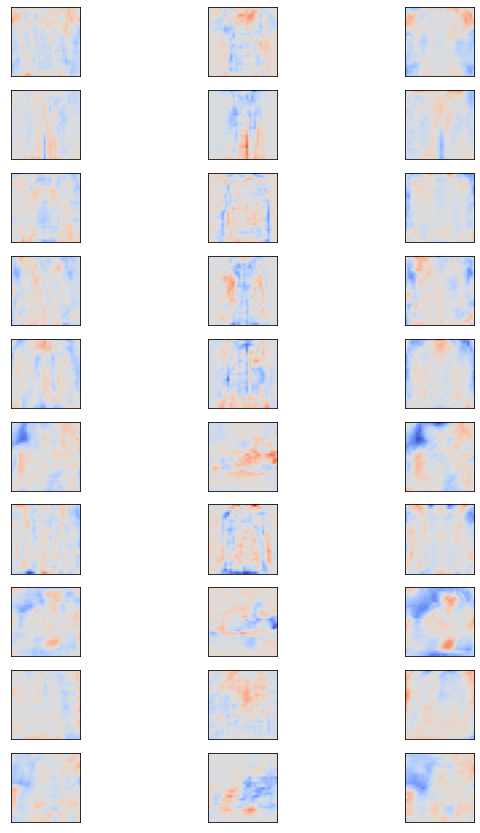

In [17]:
dp.mul_cols(mat2).plot((10,15),norm='cols')